In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import geopandas as gp

### 教學
https://www.slideshare.net/ssusereaac8d/from-pandas-to-geopandas

In [4]:
villages_shp = gp.read_file("town_shp/TOWN_MOI_1060525.shp")

In [5]:
taichung_shp = villages_shp.query('COUNTYNAME=="臺中市"')

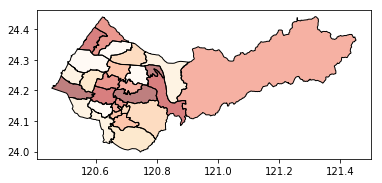

In [6]:
taichung_shp.plot(cmap='OrRd',)
plt.show()

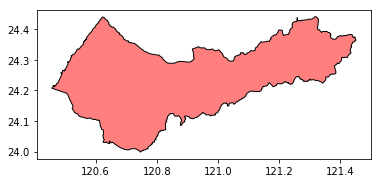

In [12]:
from shapely.ops import cascaded_union
mergedpoly = gp.GeoSeries(cascaded_union(taichung_shp['geometry']))
mergedpoly.plot(color = 'red')
plt.show()